In [1]:
import src.graph_maker as GraphMaker
import src.data_loader as DataLoader
import src.Mechanisms as Mec
import matplotlib.pyplot as plt

def score(mec):
    sql = mec.compute_SQL()
    ae = mec.compute_AE()
    return sql, ae

/home/takagi/workspace/venv/lib/python3.8/site-packages/pyproj/crs/crs.py:279: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  projstring = _prepare_from_string(projparams)
/home/takagi/workspace/venv/lib/python3.8/site-packages/pyproj/crs/crs.py:279: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  projstring = _prepare_from_string(projparams)
/home/takagi/workspace/venv/lib/python3.8/site-packages/pyproj/crs/crs.py:279: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making 

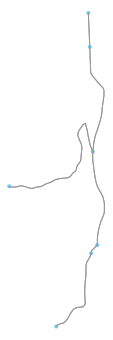

In [2]:
lat, lon = (39.898740, 140.247766)
distance = 2000
name = "Akita"

mgm = GraphMaker.MapGraphMaker()
mgm.make_graph(lat, lon, distance, "Akita")
mgm.cp_dict_sd()
mgm.save()
mgm.plot_graph()

data_loader = DataLoader.DataLoader(name, prior="uniform")

GEM = Mec.GraphExponentialMechanism(data_loader)
PLMG = Mec.PlanarLaplaceMechanismOnGraph(data_loader)

In [3]:
epsilons = [0.01, 0.005, 0.003, 0.002, 0.001]
gem_sqls = []
gem_aes = []
plmg_sqls = []
plmg_aes = []
for epsilon in epsilons:
    GEM.build_distribution(epsilon)
    PLMG.build_distribution(epsilon)
    
    gem_sql, gem_ae = score(GEM)
    gem_sqls.append(gem_sql)
    gem_aes.append(gem_ae)
    
    plmg_sql, plmg_ae = score(PLMG)
    plmg_sqls.append(plmg_sql)
    plmg_aes.append(plmg_ae)

0/4

/home/takagi/workspace/venv/lib/python3.8/site-packages/scipy/integrate/quadpack.py:864: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
/home/takagi/workspace/venv/lib/python3.8/site-packages/scipy/integrate/quadpack.py:864: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


1/4

/home/takagi/workspace/venv/lib/python3.8/site-packages/scipy/integrate/quadpack.py:864: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


the optimal value: 47.229735697585404
the optimal value: 52.22224154914156
the optimal value: 172.29556783879764
the optimal value: 165.84961576922268
the optimal value: 296.41942710484693
the optimal value: 273.08811722592475
the optimal value: 358.3894589175166
the optimal value: 347.10461806907193
the optimal value: 367.50956268704067
the optimal value: 365.48844927344936


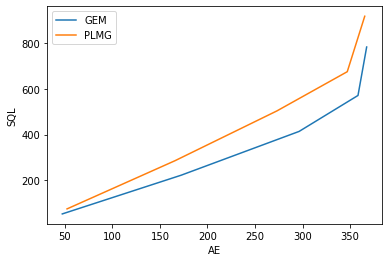

In [4]:
plt.plot(gem_aes, gem_sqls, label="GEM")
plt.plot(plmg_aes, plmg_sqls, label="PLMG")
plt.legend()
plt.xlabel("AE")
plt.ylabel("SQL")
plt.show()